In [2]:
library("devtools")
library("tidyverse")

Warning message:
“package ‘devtools’ was built under R version 4.3.1”
Loading required package: usethis

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2          ✔ readr     2.1.4     
✔ forcats   1.0.0.9000     ✔ stringr   1.5.0     
✔ ggplot2   3.4.3          ✔ tibble    3.2.1     
✔ lubridate 1.9.2          ✔ tidyr     1.3.0     
✔ purrr     1.0.2          
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
zm_all_data <- readRDS("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/03.peak_assignment/os_dir/os_acr_classification.no_exons.combined_data.rds")

In [4]:
zm_all_pvalues <- read_delim("/scratch/jpm73279/comparative_single_cell/07.call.ACRs/03.peak_assignment/os_dir/os_acr_classification.no_exons.all_pvalues.csv", delim = ",")

Rows: 438683 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): ACR_values, cell_type
dbl (5): perm_pval, perm_pval_lower, perm_pval_upper, pnorm_pval, z_score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
glimpse(zm_all_data)

Rows: 438,683
Columns: 16
$ ACR_values          <chr> "scACR_1", "scACR_1", "scACR_1", "scACR_1", "scACR…
$ cell_type           <chr> "bundle_sheath", "companion_cell", "epidermis", "m…
$ distribution        <list> [<tbl_df[2000 x 1]>], [<tbl_df[2000 x 1]>], [<tbl…
$ null_dist           <list> [<tbl_df[28000 x 1]>], [<tbl_df[28000 x 1]>], [<t…
$ list_len            <dbl> 28001, 28001, 28001, 28001, 28001, 28001, 28001, 2…
$ median_val          <dbl> 6.080003, 4.114822, 6.504683, 5.842573, 5.000849, …
$ conf_interval_lower <dbl> 5.541390, 3.605381, 6.057118, 5.420734, 4.347297, …
$ conf_interval_upper <dbl> 6.618036, 4.644064, 6.998973, 6.295611, 5.683035, …
$ med_val_perm        <int> 24363, 3, 27681, 19688, 1938, 27208, 7293, 14781, …
$ perm_pval           <dbl> 0.870076069, 0.000107139, 0.988571837, 0.703117746…
$ perm_pval_lower     <dbl> 0.4280204278, 0.0000000000, 0.8573979501, 0.318381…
$ perm_pval_upper     <dbl> 0.995357309, 0.009213957, 0.999928574, 0.953894504…
$ null_dist_me

In [6]:
# options(repr.plot.width=15, repr.plot.height=15)
# #Bad looking on browser - edge of Sig
# look_group <- c("scACR_4671", "scACR_13067", "scACR_14828")
# plot_acr_null_real <- zm_all_data %>% 
#     ungroup() %>% 
#     dplyr::filter(ACR_values %in% look_group) 

In [7]:
glimpse(zm_all_data)

Rows: 438,683
Columns: 16
$ ACR_values          <chr> "scACR_1", "scACR_1", "scACR_1", "scACR_1", "scACR…
$ cell_type           <chr> "bundle_sheath", "companion_cell", "epidermis", "m…
$ distribution        <list> [<tbl_df[2000 x 1]>], [<tbl_df[2000 x 1]>], [<tbl…
$ null_dist           <list> [<tbl_df[28000 x 1]>], [<tbl_df[28000 x 1]>], [<t…
$ list_len            <dbl> 28001, 28001, 28001, 28001, 28001, 28001, 28001, 2…
$ median_val          <dbl> 6.080003, 4.114822, 6.504683, 5.842573, 5.000849, …
$ conf_interval_lower <dbl> 5.541390, 3.605381, 6.057118, 5.420734, 4.347297, …
$ conf_interval_upper <dbl> 6.618036, 4.644064, 6.998973, 6.295611, 5.683035, …
$ med_val_perm        <int> 24363, 3, 27681, 19688, 1938, 27208, 7293, 14781, …
$ perm_pval           <dbl> 0.870076069, 0.000107139, 0.988571837, 0.703117746…
$ perm_pval_lower     <dbl> 0.4280204278, 0.0000000000, 0.8573979501, 0.318381…
$ perm_pval_upper     <dbl> 0.995357309, 0.009213957, 0.999928574, 0.953894504…
$ null_dist_me

In [8]:
## Generate the same plot looking at ACRs associated with marker genes 
options(repr.plot.width=15, repr.plot.height=15)
#Bad looking on browser - edge of Sig
# MS MS BS 
look_group <- c("scACR_27047", "scACR_1719", "scACR_49825", "scACR_38596")
plot_acr_null_real <- zm_all_data %>% 
    ungroup() %>% 
    dplyr::filter(ACR_values %in% look_group) %>% 
    dplyr::filter(cell_type %in% c("epidermis",  "bundle_sheath", "mesophyll")) %>% 
    mutate(ACR_values = factor(ACR_values, levels = look_group)) %>%  # Reorder the levels of ACR_values
    unnest(distribution) %>% 
    rename(real_value = value) %>% 
    mutate(null_dist = lapply(null_dist, function(x) x %>% sample_n(5000))) %>% # Subsampling 5000 entries
    unnest(null_dist)%>% 
    rename(null_value = value) %>% 
    pivot_longer(c(real_value, null_value), names_to = "class", values_to = "val")


In [9]:
library(cowplot)
library(patchwork)


Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [10]:
plot_acr_null_real

ACR_values,cell_type,list_len,median_val,conf_interval_lower,conf_interval_upper,med_val_perm,perm_pval,perm_pval_lower,perm_pval_upper,null_dist_mean,null_dist_sd,pnorm_pval,z_score,class,val
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,real_value,4.494260
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,null_value,5.272172
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,real_value,4.494260
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,null_value,5.348278
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,real_value,4.494260
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,null_value,5.944155
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,real_value,4.494260
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,null_value,5.569920
scACR_1719,bundle_sheath,28001,4.681066,4.30929,5.107901,21,0.0007499732,0,0.04931967,5.615505,0.3205468,0.001777642,-2.915141,real_value,4.494260


`summarise()` has grouped output by 'class', 'cell_type'. You can override
using the `.groups` argument.


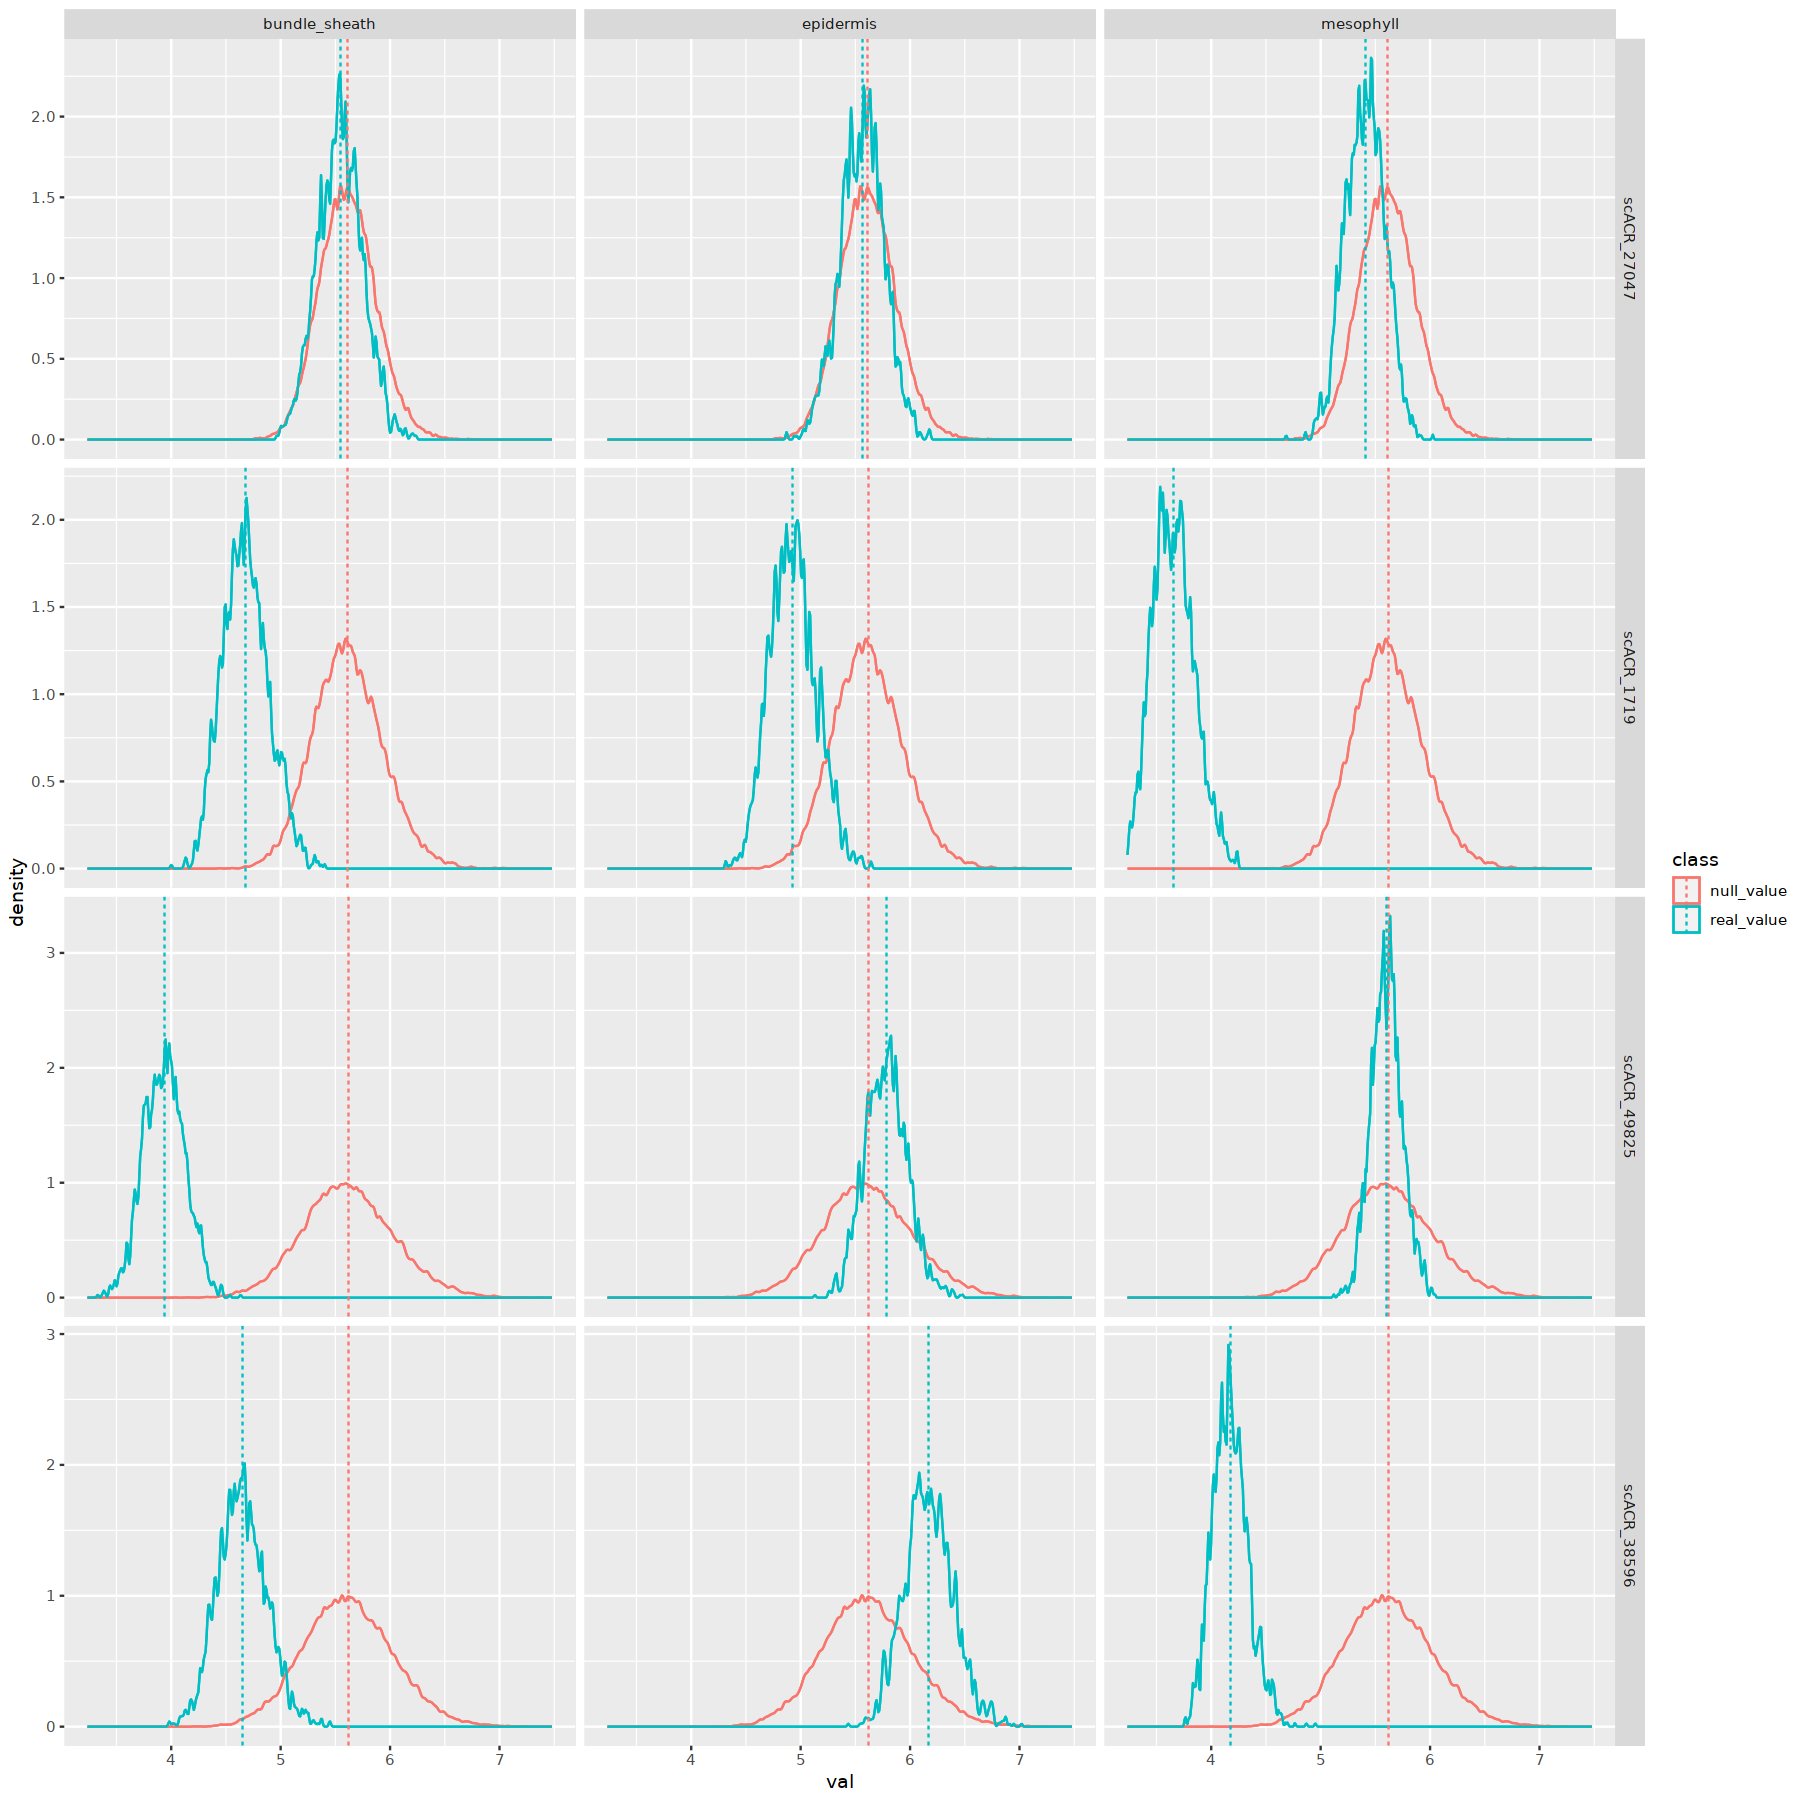

In [11]:
acr_meds <- plot_acr_null_real %>% 
    group_by(class, cell_type, ACR_values) %>% 
    summarise(median_val = mean(val))
 
ggplot(plot_acr_null_real, aes(val, color = class)) + geom_density() + geom_density(alpha = 0.1) + 
    facet_grid(ACR_values~cell_type, scales="free_y") +
      geom_vline(data=acr_meds, aes(xintercept=median_val, color=class),
             linetype="dashed") 

In [26]:
head(plot_acr_null_real)

ACR_values,cell_type,list_len,median_val,conf_interval_lower,conf_interval_upper,med_val_perm,perm_pval,perm_pval_lower,perm_pval_upper,null_dist_mean,null_dist_sd,pnorm_pval,z_score,class,val
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
scACR_5314,bundle_sheath,29989,4.637389,4.063287,5.193995,6097,0.2033079,0.07596119,0.4195872,5.161437,0.663033,0.2146529,-0.7903801,real_value,4.468701
scACR_5314,bundle_sheath,29989,4.637389,4.063287,5.193995,6097,0.2033079,0.07596119,0.4195872,5.161437,0.663033,0.2146529,-0.7903801,null_value,3.946755
scACR_5314,bundle_sheath,29989,4.637389,4.063287,5.193995,6097,0.2033079,0.07596119,0.4195872,5.161437,0.663033,0.2146529,-0.7903801,real_value,4.468701
scACR_5314,bundle_sheath,29989,4.637389,4.063287,5.193995,6097,0.2033079,0.07596119,0.4195872,5.161437,0.663033,0.2146529,-0.7903801,null_value,4.954220
scACR_5314,bundle_sheath,29989,4.637389,4.063287,5.193995,6097,0.2033079,0.07596119,0.4195872,5.161437,0.663033,0.2146529,-0.7903801,real_value,4.468701
scACR_5314,bundle_sheath,29989,4.637389,4.063287,5.193995,6097,0.2033079,0.07596119,0.4195872,5.161437,0.663033,0.2146529,-0.7903801,null_value,5.819600


In [25]:
subset <- plot_acr_null_real %>% 
    dplyr::select(ACR_values, cell_type,z_score) %>% 
    dplyr::distinct()




In [28]:
pnorm(-1.7782268, lower.tail = TRUE)

[1] 0.03768331

In [27]:
subset

ACR_values,cell_type,z_score
<fct>,<chr>,<dbl>
scACR_5314,bundle_sheath,-0.7903801
scACR_5314,epidermis,0.8779177
scACR_5314,mesophyll,0.6859526
scACR_5316,bundle_sheath,0.7067251
scACR_5316,epidermis,0.4719163
scACR_5316,mesophyll,-1.7782268
scACR_5317,bundle_sheath,0.4298118
scACR_5317,epidermis,0.3478216
scACR_5317,mesophyll,-1.0582585


In [ ]:
#Broadly ACC ACRs
## Generate the same plot looking at ACRs associated with marker genes 
options(repr.plot.width=15, repr.plot.height=15)
#Bad looking on browser - edge of Sig
#look_group <- c("scACR_726", "scACR_899", "scACR_52688")
look_group <- c("scACR_5316", "scACR_5317", "scACR_5314")

plot_acr_null_real <- zm_all_data %>% 
    ungroup() %>% 
    dplyr::filter(ACR_values %in% look_group) %>% 
    dplyr::filter(cell_type %in% c("epidermis", "companion_cells_sieve_elements", "bundle_sheath", "mesophyll")) %>% 
    mutate(ACR_values = factor(ACR_values, levels = look_group)) %>%  # Reorder the levels of ACR_values
    unnest(distribution) %>% 
    rename(real_value = value) %>% 
    unnest(null_dist)%>% 
    rename(null_value = value) %>% 
    pivot_longer(c(real_value,null_value), names_to = "class", values_to = "val") 

acr_meds <- plot_acr_null_real %>% 
    group_by(class, cell_type, ACR_values) %>% 
    summarise(median_val = mean(val))
 
ggplot(plot_acr_null_real, aes(val, color = class)) + geom_density() + facet_grid(ACR_values~cell_type, scales="free_y") +
      geom_vline(data=acr_meds, aes(xintercept=median_val, color=class),
             linetype="dashed")

In [7]:
acr_meds

class,cell_type,ACR_values,median_val
<chr>,<chr>,<fct>,<dbl>
null_value,bundle_sheath,scACR_4671,5.175151
null_value,bundle_sheath,scACR_4670,5.160342
null_value,bundle_sheath,scACR_5927,5.164167
null_value,companion_cells_sieve_elements,scACR_4671,5.175151
null_value,companion_cells_sieve_elements,scACR_4670,5.160342
null_value,companion_cells_sieve_elements,scACR_5927,5.164167
null_value,epidermis,scACR_4671,5.175151
null_value,epidermis,scACR_4670,5.160342
null_value,epidermis,scACR_5927,5.164167


In [6]:
glimpse(plot_acr_null_real)

Rows: 568,848,000
Columns: 16
$ ACR_values          <fct> scACR_4670, scACR_4670, scACR_4670, scACR_4670, sc…
$ cell_type           <chr> "bundle_sheath", "bundle_sheath", "bundle_sheath",…
$ list_len            <dbl> 23947, 23947, 23947, 23947, 23947, 23947, 23947, 2…
$ median_val          <dbl> 3.444895, 3.444895, 3.444895, 3.444895, 3.444895, …
$ conf_interval_lower <dbl> 2.813012, 2.813012, 2.813012, 2.813012, 2.813012, …
$ conf_interval_upper <dbl> 4.069715, 4.069715, 4.069715, 4.069715, 4.069715, …
$ med_val_perm        <int> 401, 401, 401, 401, 401, 401, 401, 401, 401, 401, …
$ perm_pval           <dbl> 0.01674531, 0.01674531, 0.01674531, 0.01674531, 0.…
$ perm_pval_lower     <dbl> 0.001920909, 0.001920909, 0.001920909, 0.001920909…
$ perm_pval_upper     <dbl> 0.06919447, 0.06919447, 0.06919447, 0.06919447, 0.…
$ null_dist_mean      <dbl> 5.160342, 5.160342, 5.160342, 5.160342, 5.160342, …
$ null_dist_sd        <dbl> 0.6241811, 0.6241811, 0.6241811, 0.6241811, 0.6241…
$ pnorm_pv

In [22]:
library(cowplot)

brroadly_accessible_ACRs <- ggplot(plot_acr_null_real, aes(val, color = class)) + geom_density(alpha = 0.1) + facet_grid(ACR_values~cell_type, scales="free_y") +
      geom_vline(data=acr_meds, aes(xintercept=median_val, color=class),
             linetype="dashed") + theme_half_open() + panel_border()


In [24]:
#options(repr.plot.width=15, repr.plot.height=10)
#brroadly_accessible_ACRs
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/gordon_conference/broadly_acc_ACRs.pdf", plot = brroadly_accessible_ACRs, device = "pdf", width = 15, height = 10)

In [30]:
ggsave(filename = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/gordon_conference/cell_type_specific.ACRs.pdf", plot = cell_type_specific_plots, device = "pdf", width = 15, height = 15)

